# **Load Dependences**

In [ ]:
!pip install unidecode
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.2 MB/s eta 0:00:00


# **Imports**


In [ ]:
import json
import warnings

import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px

from pprint import pprint

# Function to remove special characters
from unidecode import unidecode

from tqdm.notebook import tqdm, trange

# Feature Importance
from sklearn.feature_selection import mutual_info_classif, chi2

my_palette = sns.diverging_palette(230, 20, as_cmap=False)
sns.set_theme(style="ticks", palette=my_palette)

# **Load Datasets**

In [ ]:
#@title Download Dataset from GDrive
# Economic Level
!gdown 1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ


df = pd.read_csv('results_scrapper_PCDII.csv', index_col=0)
df.columns = [key.replace(' ','_').capitalize() for key in df.columns]

df.rename(columns={'Nivel_economica':'Nivel_economico'}, inplace=True)

Downloading...
From: https://drive.google.com/uc?id=1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ
To: /content/results_scrapper_PCDII.csv
100% 698k/698k [00:00<00:00, 15.9MB/s]


In [ ]:
#@title Download Dataset from IBGE
#@markdown [All forms Brazil Shapefiles](https://www.ibge.gov.br/en/geosciences/territorial-organization/territorial-meshes/18890-municipal-mesh.html)

!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Municipios_2021.zip

!unzip BR_Municipios_2021.zip

# Load the shapefiles of the cities
shapefile_path = '/content/BR_Municipios_2021.shp'
gdf = gpd.read_file(shapefile_path)
# geojson_data = gdf.to_json()

--2024-10-16 20:19:48--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Municipios_2021.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203341725 (194M) [application/zip]
Saving to: ‘BR_Municipios_2021.zip’

BR_Municipios_2021. 100%[===================>] 193.92M  15.2MB/s    in 14s     

2024-10-16 20:20:04 (13.4 MB/s) - ‘BR_Municipios_2021.zip’ saved [203341725/203341725]

Archive:  BR_Municipios_2021.zip
 extracting: BR_Municipios_2021.cpg  
  inflating: BR_Municipios_2021.dbf  
  inflating: BR_Municipios_2021.prj  
  inflating: BR_Municipios_2021.shp  
  inflating: BR_Municipios_2021.shx  


In [ ]:
#@title Download UF shapefiles from IBGE

!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip

!unzip BR_UF_2021.zip

# Load the shapefiles of the cities
shapefile_path = '/content/BR_UF_2021.shp'
uf_gdf = gpd.read_file(shapefile_path)

--2024-10-16 20:20:15--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13648228 (13M) [application/zip]
Saving to: ‘BR_UF_2021.zip’

BR_UF_2021.zip      100%[===================>]  13.02M  6.33MB/s    in 2.1s    

2024-10-16 20:20:18 (6.33 MB/s) - ‘BR_UF_2021.zip’ saved [13648228/13648228]

Archive:  BR_UF_2021.zip
 extracting: BR_UF_2021.cpg          
  inflating: BR_UF_2021.dbf          
  inflating: BR_UF_2021.prj          
  inflating: BR_UF_2021.shp          
  inflating: BR_UF_2021.shx          


In [ ]:
#@title Download Intermedian Region shapefiles from IBGE

!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_RG_Intermediarias_2022.zip

!unzip BR_RG_Intermediarias_2022.zip

shapefile_path = '/content/BR_RG_Intermediarias_2022.shp'
rginter_gdf = gpd.read_file(shapefile_path)

rginter_gdf['CD_RGINT'] = rginter_gdf['CD_RGINT'].astype(int)

--2024-10-16 20:24:53--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_RG_Intermediarias_2022.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38612700 (37M) [application/zip]
Saving to: ‘BR_RG_Intermediarias_2022.zip’

BR_RG_Intermediaria 100%[===================>]  36.82M  10.6MB/s    in 3.6s    

2024-10-16 20:24:58 (10.1 MB/s) - ‘BR_RG_Intermediarias_2022.zip’ saved [38612700/38612700]

Archive:  BR_RG_Intermediarias_2022.zip
 extracting: BR_RG_Intermediarias_2022.cpg  
  inflating: BR_RG_Intermediarias_2022.dbf  
  inflating: BR_RG_Intermediarias_2022.prj  
  inflating: BR_RG_Intermediarias_2022.shp  
  inflating: BR_RG_Intermediarias_2022.shx  


In [ ]:
#@title Download Imediate Region shapefiles from IBGE

!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_RG_Imediatas_2022.zip

!unzip BR_RG_Imediatas_2022.zip

shapefile_path = '/content/BR_RG_Imediatas_2022.shp'
rgimed_gdf = gpd.read_file(shapefile_path)

rgimed_gdf['CD_RGI'] = rgimed_gdf['CD_RGI'].astype(int)

--2024-10-16 20:23:02--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_RG_Imediatas_2022.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71899366 (69M) [application/zip]
Saving to: ‘BR_RG_Imediatas_2022.zip’

BR_RG_Imediatas_202 100%[===================>]  68.57M  14.4MB/s    in 6.0s    

2024-10-16 20:23:09 (11.4 MB/s) - ‘BR_RG_Imediatas_2022.zip’ saved [71899366/71899366]



In [ ]:
#@title Download cities codes for merge datasets
!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/divisao_territorial/2022/DTB_2022.zip

!unzip DTB_2022.zip

cities_codes = pd.read_excel('RELATORIO_DTB_BRASIL_MUNICIPIO.xls', header=6, dtype={'Município': str})

--2024-10-16 20:28:41--  https://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/divisao_territorial/2022/DTB_2022.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2039162 (1.9M) [application/zip]
Saving to: ‘DTB_2022.zip’

DTB_2022.zip        100%[===================>]   1.94M  1.62MB/s    in 1.2s    

2024-10-16 20:28:43 (1.62 MB/s) - ‘DTB_2022.zip’ saved [2039162/2039162]

Archive:  DTB_2022.zip
  inflating: RELATORIO_DTB_BRASIL_DISTRITO.ods  
  inflating: RELATORIO_DTB_BRASIL_DISTRITO.xls  
  inflating: RELATORIO_DTB_BRASIL_MUNICIPIO.ods  
  inflating: RELATORIO_DTB_BRASIL_MUNICIPIO.xls  
  inflating: RELATORIO_DTB_BRASIL_SUBDISTRITO.ods  
  inflating: RELATORIO_DTB_BRASIL_SUBDISTRITO.xls  
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_ov

In [ ]:
#@title Color Frame
color_frame = gdf['CD_MUN'].astype(int)

aux_df = df[['Codigo', 'Nivel_economico']]
aux_df.rename(columns={'Codigo':'CD_MUN'}, inplace=True)

color_frame = pd.merge(aux_df, color_frame, how='right', on='CD_MUN')

# Vai de 1 a 7, os valores 0 são os não encontrados na base do governo
color_frame = color_frame.fillna(0)

color_frame['Nivel_economico'] = color_frame['Nivel_economico'].astype(int)


# Definir a paleta de cores 'coolwarm'
cmap = plt.get_cmap('coolwarm', 9)
color_frame['Color'] = color_frame['Nivel_economico'].apply(lambda x: cmap(x))

<ipython-input-6-58b162309468>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df.rename(columns={'Codigo':'CD_MUN'}, inplace=True)


# **Pre-Processing**

In [ ]:
#@title Dataframe without NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Codigo                                5570 non-null   int64  
 1   Tag                                   5570 non-null   object 
 2   Nome                                  5570 non-null   object 
 3   Latitude                              5570 non-null   float64
 4   Longitude                             5570 non-null   float64
 5   Nivel_sociocultural                   5570 non-null   int64  
 6   Nivel_economico                       5570 non-null   int64  
 7   Nivel_capacidades_institucionais      5570 non-null   int64  
 8   Nivel_meio_ambiente                   5570 non-null   int64  
 9   Pib_per_capita_do_municipio           5570 non-null   float64
 10  Pib_serviços                          5570 non-null   float64
 11  Pib_industria         

In [ ]:
#@title Describe dataset with summary measures
df.iloc[:, 5:].describe()

,Nivel_sociocultural,Nivel_economico,Nivel_capacidades_institucionais,Nivel_meio_ambiente,Pib_per_capita_do_municipio,Pib_serviços,Pib_industria,Pib_adminstração_publica,Pib_agropecuária,Populacao_estimada,População_ocupada_com_vinculo_formal
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.166000e+03
mean,3.161580,3.608259,2.089587,2.671993,33871.282487,7.020029e+05,3.579526e+05,2.188426e+05,1.061189e+05,3.645974e+04,8.966708e+03
std,0.455327,0.721277,0.345896,0.793189,41908.722752,8.354328e+06,2.116549e+06,1.935274e+06,2.391838e+05,2.065187e+05,7.058485e+04
min,2.000000,2.000000,1.000000,1.000000,5407.660000,2.712000e+03,-4.773250e+05,8.460000e+03,0.000000e+00,8.330000e+02,5.700000e+01
25%,3.000000,3.000000,2.000000,2.000000,12831.152500,2.553575e+04,5.131750e+03,3.269650e+04,1.673000e+04,5.228000e+03,6.950000e+02
50%,3.000000,4.000000,2.000000,3.000000,23401.175000,6.510350e+04,1.752800e+04,6.184350e+04,4.353700e+04,1.106500e+04,1.486000e+03
75%,3.000000,4.000000,2.000000,3.000000,40807.450000,2.071265e+05,1.058122e+05,1.340735e+05,1.039875e+05,2.442725e+04,3.969000e+03
max,5.000000,6.000000,6.000000,5.000000,920833.970000,5.497674e+08,6.561607e+07,1.168092e+08,5.004238e+06,1.145200e+07,3.933486e+06


In [ ]:
#@title View dataset struct
df.head()

,Codigo,Tag,Nome,Latitude,Longitude,Nivel_sociocultural,Nivel_economico,Nivel_capacidades_institucionais,Nivel_meio_ambiente,Pib_per_capita_do_municipio,Pib_serviços,Pib_industria,Pib_adminstração_publica,Pib_agropecuária,Populacao_estimada,População_ocupada_com_vinculo_formal
0,5200050,abadia-de-goias,Abadia de Goiás (GO),-16.75730,-49.4412,3,4,2,4,38622.00,155667.0,79642.0,60642.0,14324.0,19128.0,1703.0
1,3100104,abadia-dos-dourados,Abadia dos Dourados (MG),-18.48310,-47.3916,3,3,2,2,25174.26,43394.0,10618.0,38588.0,75110.0,6272.0,1342.0
2,5200100,abadiania,Abadiânia (GO),-16.19700,-48.7057,3,4,3,3,21334.94,168151.0,56944.0,93456.0,81207.0,17232.0,2823.0
3,3100203,abaete,Abaeté (MG),-19.15510,-45.4444,4,4,2,2,23266.10,220438.0,40612.0,108971.0,127033.0,22675.0,5884.0
4,1500107,abaetetuba,Abaetetuba (PA),-1.72183,-48.8788,3,4,2,2,12150.04,754254.0,73666.0,670593.0,272103.0,158188.0,16450.0


In [ ]:
#@title Rename dataset keys
#@markdown Remove special characters from the features names

df = df.rename(columns={key: unidecode(key).replace(' ', '_') for key in df.keys()})

In [ ]:
#@title Get state and city in dataframe
#@markdown Separate State and City from the Municipio attribute

def format_city(city: str):

  city_without_special_charac = unidecode(city)

  city_capitalize = city_without_special_charac.capitalize()

  return city_capitalize

# Get nome of the cities
df['Municipio'] = df['Nome'].str.extract(r'^(.+?) \(')
df['Municipio'] = df['Municipio'].apply(lambda x: format_city(x))

# Get state of the cities
df['Estado'] = df['Nome'].str.extract(r'\((\w+)\)')

# Drop old columns
df = df.drop(columns=['Tag', 'Nome'])

# Reorder the columns
df = df[df.columns[-2:].tolist() + df.columns[:-2].tolist()]

In [ ]:
#@title Add region in Dataframe
state_to_region = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

df['Regiao'] = df['Estado'].map(state_to_region)

In [ ]:
#@title Add Inter and Imed Regions codes in dataframe
cities_codes = cities_codes.rename(columns={'Código Município Completo':'Codigo'})

df = pd.merge(df, cities_codes[['Codigo', 'Região Geográfica Imediata', 'Região Geográfica Intermediária']], how='left', on='Codigo')

# **Exploratory Data Analisys**

## **Cities Analysis - Economic Level**

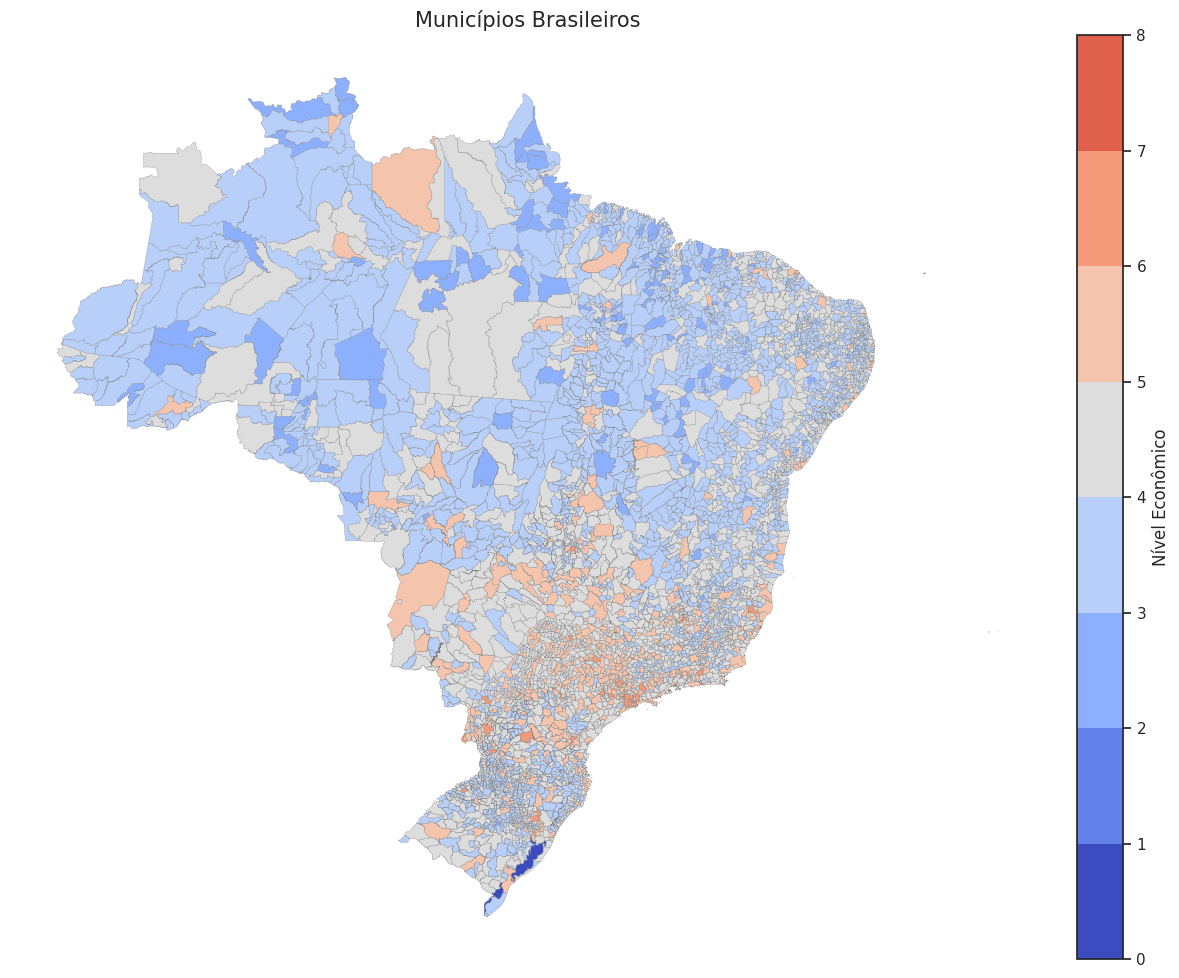

In [ ]:
#@title Economic Level by Cities
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(20, 12))

# Plotar o GeoDataFrame
gdf.plot(
    ax=ax,
    color=color_frame['Color'].to_numpy(),
    edgecolor='gray',
    linewidth=0.2
)

# Definir o título do gráfico
ax.set_title('Municípios Brasileiros', fontsize=15)

# Remover os eixos (opcional, para focar só no mapa)
ax.set_axis_off()

# Adicionar a barra de cores
norm = mpl.colors.BoundaryNorm(boundaries=np.arange(0, 9, 1), ncolors=8)  # Normaliza para a barra de cores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Define um array vazio para o mapeamento
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Nível Econômico', fontsize=12)  # Adicione um rótulo à barra de cores


# Mostrar o mapa
plt.show()

In [ ]:
#@title Analise do número de cidades com determinado nivel economico
fig = go.Figure()

nivel_num_cities_cities = df.groupby('Nivel_economico').agg('size').reset_index().rename(columns={0:'Num_Cidades'})

fig.add_trace(
    go.Bar(
        y=nivel_num_cities_cities['Nivel_economico'],
        x=nivel_num_cities_cities['Num_Cidades'],
        text=nivel_num_cities_cities['Num_Cidades'],
        textposition='outside',
        marker_color=px.colors.sequential.Magma[::-1],
        orientation='h'
    )
)

fig.update_layout(
    title='Numero de Cidades por Nivel Economico',
    yaxis_title='Nivel Economico',
    xaxis_title='Numero de Cidades',
    template='plotly_white'
)

fig.show()

## **Region Analysis - Economic Level**

In [ ]:
#@title Number of the cities in each Region
reg_by_city = df.groupby('Regiao').agg('size').reset_index().rename(columns={0:'Num_cidades'})
reg_by_city = reg_by_city.sort_values('Num_cidades')

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=reg_by_city['Num_cidades'],
        y=reg_by_city['Regiao'],
        orientation='h',
        marker_color=px.colors.sequential.Magma[::-1],
        text=reg_by_city['Num_cidades'],
        textposition='outside'
    )
)

fig.update_layout(
    title="Número de Cidades por Região",
    xaxis_title="Número de Cidades",
    yaxis_title="Região",
    template='plotly_white',
    width=1000,
    height=600,
)

fig.show()

In [ ]:
#@title Number of the Cities by Economic Level in each Region
reg_nv_economic_num_cities = df.groupby(['Regiao', 'Nivel_economico']).agg('size').reset_index().rename(columns={0:'Num_cidades'})

fig = go.Figure()

economic_nivel = reg_nv_economic_num_cities['Nivel_economico'].unique()

for nivel in economic_nivel:
  aux_frame = reg_nv_economic_num_cities
  aux_frame = aux_frame[aux_frame['Nivel_economico'] == nivel]

  fig.add_trace(
      go.Bar(
          name=f'Nivel Economico {nivel}',
          x=aux_frame['Regiao'],
          y=aux_frame['Num_cidades'],
          text=aux_frame['Num_cidades'],
          textposition='outside'
      )
  )


fig.update_layout(
    title='Numero de Cidades por Região e Nivel Economico',
    xaxis_title='Região',
    yaxis_title='Numero de Cidades',
    barmode='group',
    template='plotly_white',
    width=1200,
    height=500
)

fig.show()

In [ ]:
#@title Porcentagem do Numero de Cidades por Nivel Economico em cada Região
num_cities_by_region = df.groupby('Regiao').agg('size').reset_index().rename(columns={0: 'Num_cidades'})

reg_nv_economic_num_cities_percent = reg_nv_economic_num_cities.copy()

for region in df['Regiao'].unique():
    num_cities = num_cities_by_region.loc[num_cities_by_region['Regiao'] == region, 'Num_cidades'].values[0]

    reg_nv_economic_num_cities_percent.loc[reg_nv_economic_num_cities_percent['Regiao'] == region, 'Num_cidades'] = (
        reg_nv_economic_num_cities_percent.loc[reg_nv_economic_num_cities_percent['Regiao'] == region, 'Num_cidades'] / num_cities
    )

fig = go.Figure()

economic_nivel = reg_nv_economic_num_cities['Nivel_economico'].unique()

for nivel in economic_nivel:
  aux_frame = reg_nv_economic_num_cities_percent
  aux_frame = aux_frame[aux_frame['Nivel_economico'] == nivel]

  fig.add_trace(
      go.Bar(
          name=f'Nivel Economico {nivel}',
          x=aux_frame['Regiao'],
          y=aux_frame['Num_cidades'],
          text=aux_frame['Num_cidades'].apply(lambda x : round(x, 3)),
          textposition='outside'
      )
  )


fig.update_layout(
    title='Porcentagem do Numero de Cidades por Região e Nivel Economico',
    xaxis_title='Região',
    yaxis_title='Numero de Cidades',
    barmode='group',
    template='plotly_white',
    width=1200,
    height=500
)

fig.show()

<ipython-input-48-d9ce7fabdf1d>:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.01498929 0.45824411 0.43683084 0.08779443 0.00214133]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



## **State Analysis - Economic Level**

In [ ]:
#@title Number of the cities by State
state_group = df.groupby(['Estado']).size().reset_index().rename(columns={0:'Num_cidades'})
state_group = state_group.sort_values('Num_cidades', ascending=True)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=state_group['Num_cidades'],
        y=state_group['Estado'],
        orientation='h',
        marker=dict(
            color=state_group['Num_cidades'],
            colorscale=px.colors.sequential.Magma[::-1]
        ),
        text=state_group['Num_cidades'],
        textposition='outside'
    )
)

fig.update_xaxes(showgrid=False, showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, showline=True, linewidth=1, linecolor='black')

fig.update_layout(
    title='Numero de Cidades por Estado',
    yaxis_title='Numero de Cidades',
    template='plotly_white',
    height=800
)

fig.show()

In [ ]:
#@title Plot Function
state_group = df.groupby(['Estado', 'Nivel_economico']).agg('size')
state_group = state_group.reset_index().rename(columns={0:'Num_cidades'})

#@title Porcentagem do Numero de Cidades por Nivel Economico em cada Região
num_cities_by_state = df.groupby('Estado').agg('size').reset_index().rename(columns={0: 'Num_cidades'})

state_group_percent = state_group.copy()

for state in df['Estado'].unique():
    num_cities = num_cities_by_state.loc[num_cities_by_state['Estado'] == state, 'Num_cidades'].values[0]

    state_group_percent.loc[state_group_percent['Estado'] == state, 'Num_cidades'] = (
        state_group_percent.loc[state_group_percent['Estado'] == state, 'Num_cidades'] / num_cities
    )

fig = go.Figure()

for nivel_ec in state_group['Nivel_economico'].unique():
  aux_frame = state_group_percent[state_group['Nivel_economico'] == nivel_ec]

  fig.add_trace(
      go.Bar(
          name=f"Nivel {nivel_ec}",
          x=aux_frame['Estado'],
          y=aux_frame['Num_cidades']
      )
  )

fig.update_layout(
    title='Porcentagem Cidades com Nivel Economico por Estado',
    yaxis_title='Numero de Cidades',
    template='plotly_white',
)

fig.update_xaxes(showgrid=False, showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=False, showline=True, linewidth=1, linecolor='black')
fig.show()

<ipython-input-51-24eda8e54822>:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.00406504 0.41869919 0.47154472 0.10162602 0.00406504]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



## **Comparative Spatial Analisys**

<ipython-input-43-e832579b21ac>:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, sigla in zip(median_uf_gdf.geometry.centroid.x, median_uf_gdf.geometry.centroid.y, median_uf_gdf['SIGLA']):
<ipython-input-43-e832579b21ac>:53: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, sigla in zip(mode_uf_gdf.geometry.centroid.x, mode_uf_gdf.geometry.centroid.y, mode_uf_gdf['SIGLA']):
<ipython-input-43-e832579b21ac>:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, sigla in zip(mean_uf_gdf.geometry.centroid.x, mean_uf_gdf.geometry.centroid.y, mean_uf_gdf[

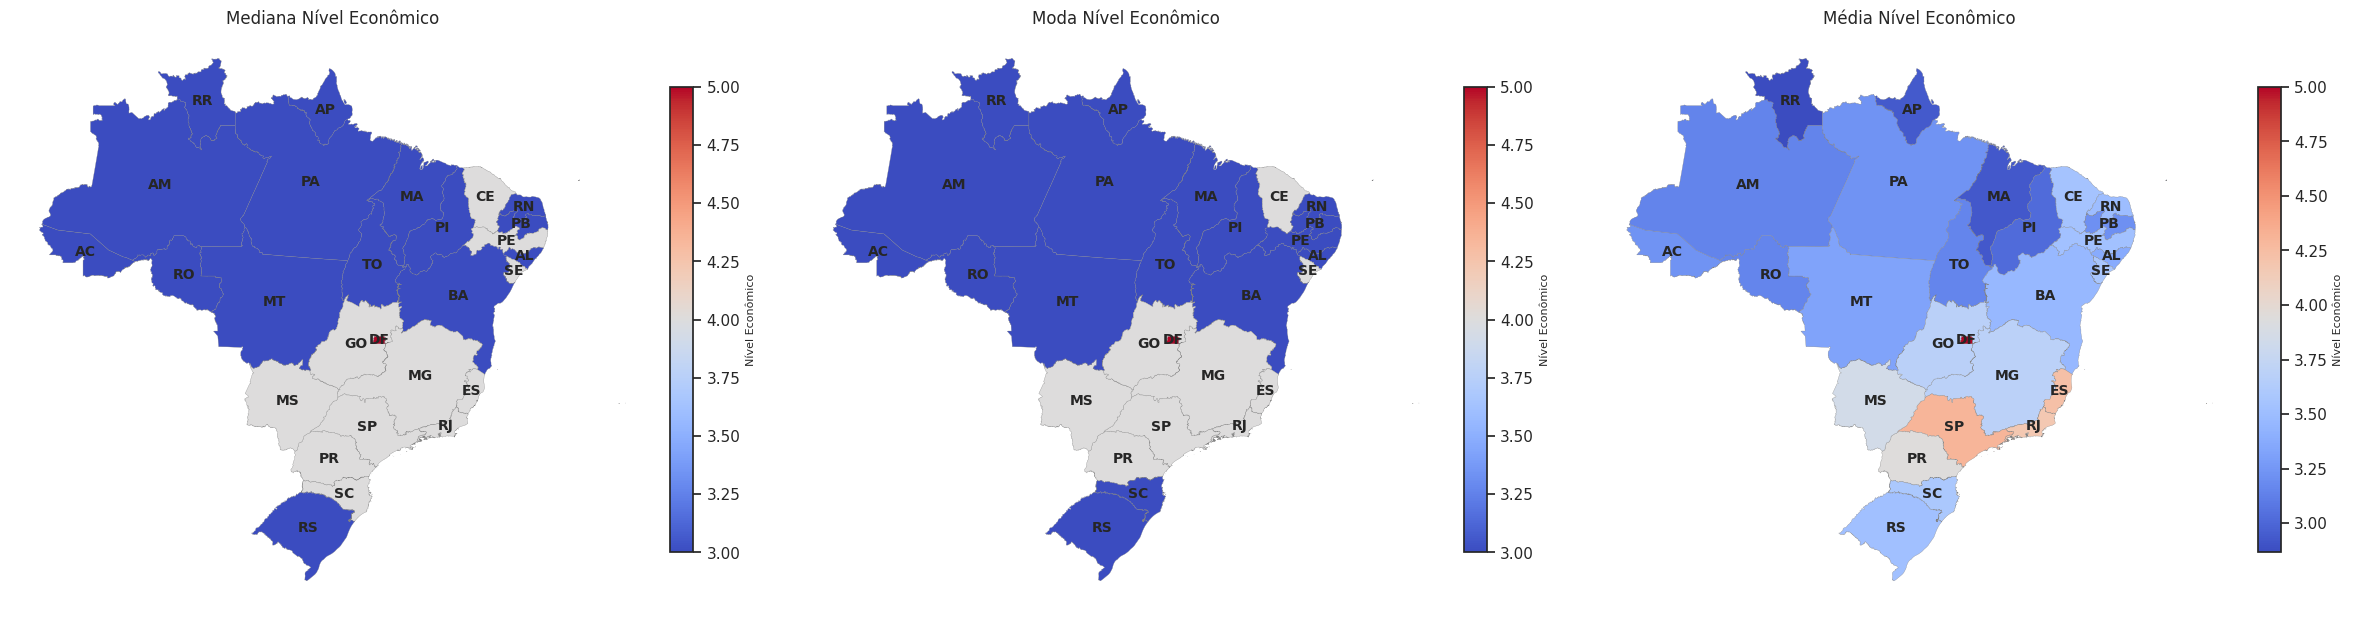

In [ ]:
#@title Summary Economic Level by State

# Cálculos de mediana, moda e média
median_nve_by_state = df.groupby('Estado').agg({'Nivel_economico':'median'}).reset_index().rename(columns={'Estado':'SIGLA'})
mode_nve_by_state = df.groupby('Estado').agg({'Nivel_economico':lambda x: x.mode()[0]}).reset_index().rename(columns={'Estado':'SIGLA'})
mean_nve_by_state = df.groupby('Estado').agg({'Nivel_economico':'mean'}).reset_index().rename(columns={'Estado':'SIGLA'})

# Merge com o GeoDataFrame
median_uf_gdf = pd.merge(uf_gdf, median_nve_by_state, on='SIGLA', how='inner')
mode_uf_gdf = pd.merge(uf_gdf, mode_nve_by_state, on='SIGLA', how='inner')
mean_uf_gdf = pd.merge(uf_gdf, mean_nve_by_state, on='SIGLA', how='inner')

# Criação dos subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 12))  # 3 mapas lado a lado

# Parâmetros de estilo
cmap = 'coolwarm'
edgecolor = 'gray'
linewidth = 0.2

# Função para adicionar barra de cores
def add_colorbar(fig, ax, gdf, column, cmap, label):
    norm = mpl.colors.Normalize(vmin=gdf[column].min(), vmax=gdf[column].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.4)
    cbar.set_label(label, fontsize=8)

# Plot Mediana
median_uf_gdf.plot(
    ax=axes[0],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[0].set_title('Mediana Nível Econômico')
axes[0].set_axis_off()
for x, y, sigla in zip(median_uf_gdf.geometry.centroid.x, median_uf_gdf.geometry.centroid.y, median_uf_gdf['SIGLA']):
    axes[0].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[0], median_uf_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

# Plot Moda
mode_uf_gdf.plot(
    ax=axes[1],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[1].set_title('Moda Nível Econômico')
axes[1].set_axis_off()
for x, y, sigla in zip(mode_uf_gdf.geometry.centroid.x, mode_uf_gdf.geometry.centroid.y, mode_uf_gdf['SIGLA']):
    axes[1].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[1], mode_uf_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

# Plot Média
mean_uf_gdf.plot(
    ax=axes[2],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[2].set_title('Média Nível Econômico')
axes[2].set_axis_off()
for x, y, sigla in zip(mean_uf_gdf.geometry.centroid.x, mean_uf_gdf.geometry.centroid.y, mean_uf_gdf['SIGLA']):
    axes[2].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[2], mean_uf_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

plt.tight_layout()
plt.show()

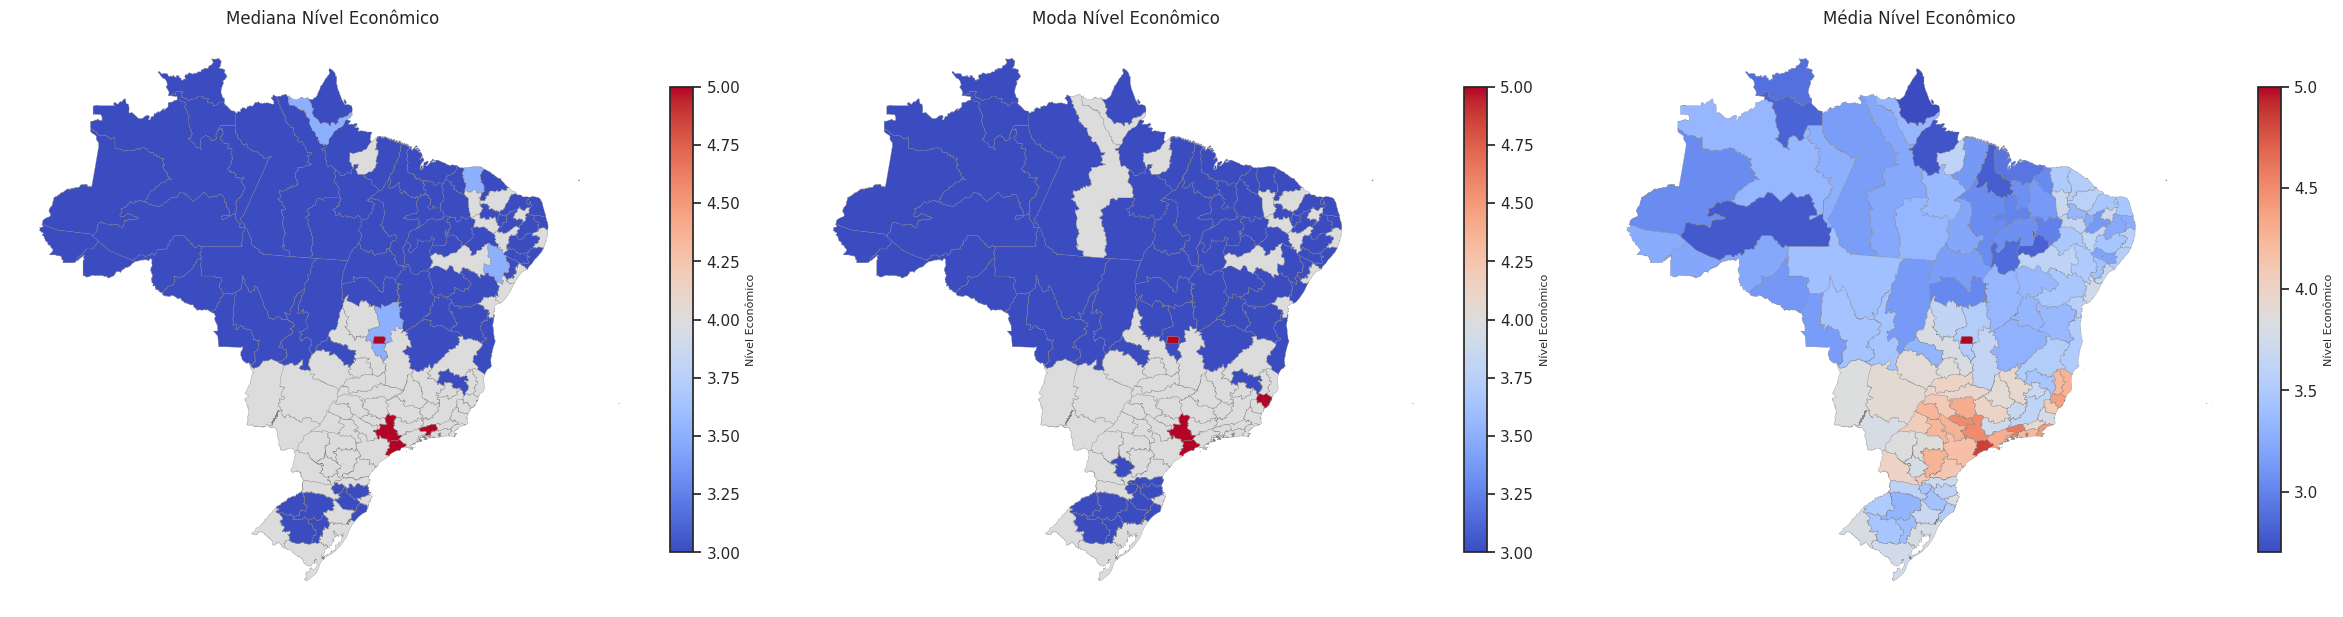

In [ ]:
#@title Summary Economic Level by Rginter

median_nve_by_rginter = df.groupby('Região Geográfica Intermediária').agg({'Nivel_economico':'median'}).reset_index().rename(columns={'Região Geográfica Intermediária':'CD_RGINT'})
mode_nve_by_rginter = df.groupby('Região Geográfica Intermediária').agg({'Nivel_economico':lambda x: x.mode()[0]}).reset_index().rename(columns={'Região Geográfica Intermediária':'CD_RGINT'})
mean_nve_by_rginter = df.groupby('Região Geográfica Intermediária').agg({'Nivel_economico':'mean'}).reset_index().rename(columns={'Região Geográfica Intermediária':'CD_RGINT'})

median_rginter_gdf = pd.merge(rginter_gdf, median_nve_by_rginter, on='CD_RGINT', how='inner')
mode_rginter_gdf = pd.merge(rginter_gdf, mode_nve_by_rginter, on='CD_RGINT', how='inner')
mean_rginter_gdf = pd.merge(rginter_gdf, mean_nve_by_rginter, on='CD_RGINT', how='inner')

# Criação dos subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 12))  # 3 mapas lado a lado

# Parâmetros de estilo
cmap = 'coolwarm'
edgecolor = 'gray'
linewidth = 0.2

# Plot Mediana
median_rginter_gdf.plot(
    ax=axes[0],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[0].set_title('Mediana Nível Econômico')
axes[0].set_axis_off()
# for x, y, sigla in zip(median_rginter_gdf.geometry.centroid.x, median_rginter_gdf.geometry.centroid.y, median_rginter_gdf['CD_RGINT']):
#     axes[0].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[0], median_rginter_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

# Plot Moda
mode_rginter_gdf.plot(
    ax=axes[1],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[1].set_title('Moda Nível Econômico')
axes[1].set_axis_off()
# for x, y, sigla in zip(mode_rginter_gdf.geometry.centroid.x, mode_rginter_gdf.geometry.centroid.y, mode_rginter_gdf['CD_RGINT']):
#     axes[1].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[1], mode_rginter_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

# Plot Média
mean_rginter_gdf.plot(
    ax=axes[2],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[2].set_title('Média Nível Econômico')
axes[2].set_axis_off()
# for x, y, sigla in zip(mean_rginter_gdf.geometry.centroid.x, mean_rginter_gdf.geometry.centroid.y, mean_rginter_gdf['CD_RGINT']):
#     axes[2].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[2], mean_rginter_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

plt.tight_layout()
plt.show()

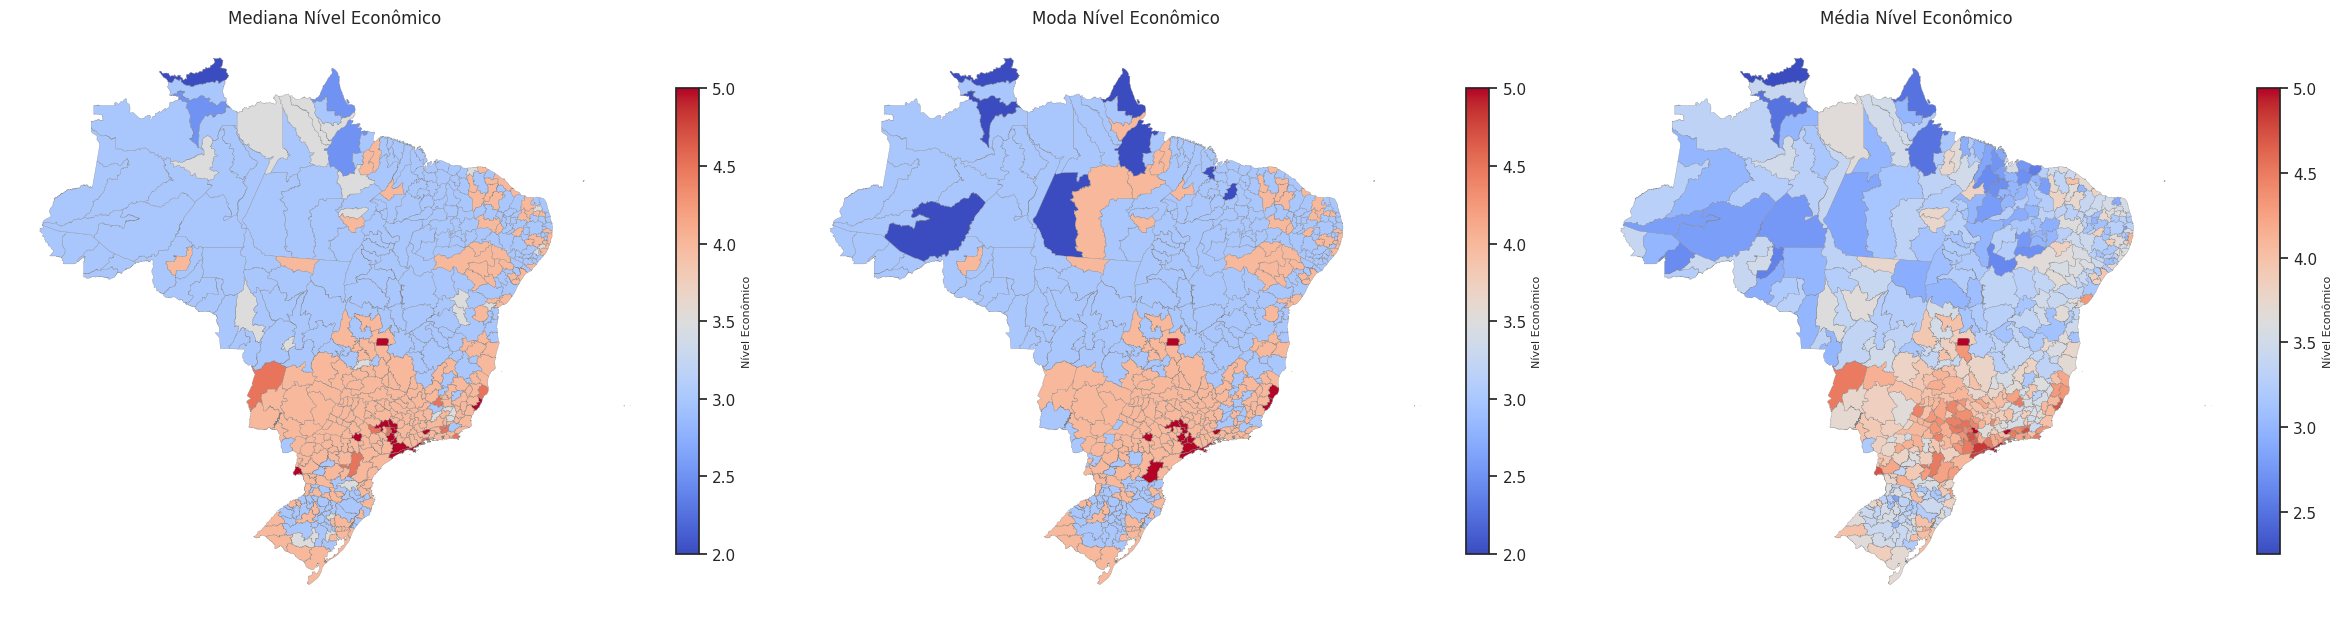

In [ ]:
#@title Summary Economic Level by Rgimed

median_nve_by_rgimed = df.groupby('Região Geográfica Imediata').agg({'Nivel_economico':'median'}).reset_index().rename(columns={'Região Geográfica Imediata':'CD_RGI'})
mode_nve_by_rgimed = df.groupby('Região Geográfica Imediata').agg({'Nivel_economico':lambda x: x.mode()[0]}).reset_index().rename(columns={'Região Geográfica Imediata':'CD_RGI'})
mean_nve_by_rgimed = df.groupby('Região Geográfica Imediata').agg({'Nivel_economico':'mean'}).reset_index().rename(columns={'Região Geográfica Imediata':'CD_RGI'})

median_rgimed_gdf = pd.merge(rgimed_gdf, median_nve_by_rgimed, on='CD_RGI', how='inner')
mode_rgimed_gdf = pd.merge(rgimed_gdf, mode_nve_by_rgimed, on='CD_RGI', how='inner')
mean_rgimed_gdf = pd.merge(rgimed_gdf, mean_nve_by_rgimed, on='CD_RGI', how='inner')

# Criação dos subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 12))  # 3 mapas lado a lado

# Parâmetros de estilo
cmap = 'coolwarm'
edgecolor = 'gray'
linewidth = 0.2

# Plot Mediana
median_rgimed_gdf.plot(
    ax=axes[0],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[0].set_title('Mediana Nível Econômico')
axes[0].set_axis_off()
# for x, y, sigla in zip(median_rgimed_gdf.geometry.centroid.x, median_rgimed_gdf.geometry.centroid.y, median_rgimed_gdf['CD_RGI']):
#     axes[0].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[0], median_rgimed_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

# Plot Moda
mode_rgimed_gdf.plot(
    ax=axes[1],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[1].set_title('Moda Nível Econômico')
axes[1].set_axis_off()
# for x, y, sigla in zip(mode_rgimed_gdf.geometry.centroid.x, mode_rgimed_gdf.geometry.centroid.y, mode_rgimed_gdf['CD_RGI']):
#     axes[1].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[1], mode_rgimed_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

# Plot Média
mean_rgimed_gdf.plot(
    ax=axes[2],
    column='Nivel_economico',
    cmap=cmap,
    edgecolor=edgecolor,
    linewidth=linewidth
)
axes[2].set_title('Média Nível Econômico')
axes[2].set_axis_off()
# for x, y, sigla in zip(mean_rgimed_gdf.geometry.centroid.x, mean_rgimed_gdf.geometry.centroid.y, mean_rgimed_gdf['CD_RGI']):
#     axes[2].text(x, y, sigla, fontsize=10, ha='center', va='center', fontweight='bold')
add_colorbar(fig, axes[2], mean_rgimed_gdf, 'Nivel_economico', cmap, 'Nível Econômico')

plt.tight_layout()
plt.show()